# Lab | Customer Analysis Final Round

## 01 - Problem (case study)

### Data description

In [616]:
df = pd.read_csv("/Users/ayeesha/IH-Labs/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")
display(df.head())
df.describe().T

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10910.0,5454.500000,3149.590053,0.000000,2727.250000,5454.500000,8181.750000,10909.000000
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


The data provided in CSV file corresponds to a vehicle insurance company.

The first column named Unamed: 0 looks like an index column, which is not useful for our analysis. So in the later preprocessing and cleanup steps we will drop this column
The second column named Customer has customer id's of all the customers. This column is also not useful for our analysis, hence we will drop this as well
df['State'].unique()
df['State'].uniq

In [617]:
df['State'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

- The third column `State` is a nominal categorical column which contains the state of the customer. In our dataset it has 5 unique values with some `NaN`

count    10910.000000
mean      8018.241094
std       6885.081434
min       1898.007675
25%       4014.453113
50%       5771.147235
75%       8992.779137
max      83325.381190
Name: Customer Lifetime Value, dtype: float64


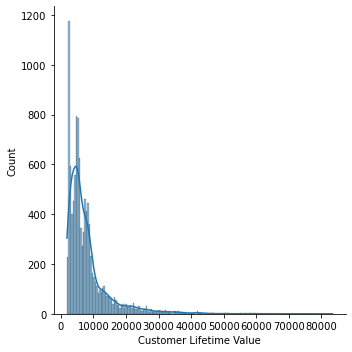

In [618]:
print(df['Customer Lifetime Value'].describe())
sns.displot(df['Customer Lifetime Value'],kde = True)
plt.show()

- The column `Customer Lifetime Value` consists of lifetime value of the customers. This is a numerical field which has a mean of 8018.24 and a std deviation of 6885.08. Based on these statistics this column has some outliers

In [619]:
df['Response'].unique()

array(['No', 'Yes', nan], dtype=object)

- `Response` column is a boolean field, where the customer has responded

I dont know how to write the description of case study. i did for 4 columns

## Goal

The goal of this analysis is to predict the `Total Claim Amount` (y) based on provided independent variables (X). We will use Linear Regression method to train the model and calculate the R2, MSE, RMSE and MAE based on the dataset provided.

## Getting Data

In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [621]:
df = pd.read_csv("/Users/ayeesha/IH-Labs/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")
df.shape

(10910, 26)

## Cleaning/Wrangling

### Change headers names.

In [622]:
cols = []
for column in df.columns:
    cols.append(column.lower())
df.columns = cols
df.columns = df.columns.str.replace(' ', '_')
display(df.columns)
print(df.isna().sum())

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

### Deal with NaN values

In [623]:
df['vehicle_type']= df['vehicle_type'].fillna('Not A')             
df['vehicle_type'].value_counts(dropna=False)
nan_cols = ['state','response','months_since_last_claim','number_of_open_complaints','vehicle_class','vehicle_size']
for col in nan_cols:
    df[col]=df[col].fillna(df[col].mode()[0])    
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df.isna().sum()

unnamed:_0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

### Drop unwanted index column

In [624]:
df = df.drop(['unnamed:_0'], axis=1)
df.shape

(10910, 25)

### Categorical Features

In [625]:
categorical = df.select_dtypes(object)
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Not A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Not A
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Not A


### Numerical Features

In [626]:
numerical = df.select_dtypes(np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,3.0,31,0.0,7,707.925645


### Exploration

In [627]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10910.0,14.444180,10.187488,0.000000,5.000000,13.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


#### Distribution

In [ ]:
for col in numerical.columns:
    sns.displot(numerical[col],kde = True)
    plt.show()

#### Boxplot

In [ ]:
for col in numerical.columns:
    sns.boxplot(y = numerical[col])
    plt.show()

#### Correlation

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
correlations = numerical.corr()
sns.heatmap(correlations, annot=True)
plt.show()

## Processing Data

#### Dealing with outliers

#### customer_lifetime_value

In [ ]:
sns.boxplot(y = numerical['customer_lifetime_value'])
sns.displot(numerical['customer_lifetime_value'], kde = True)
print(numerical['customer_lifetime_value'].describe())

In [ ]:
iqr = numerical['customer_lifetime_value'].quantile(0.75) - numerical['customer_lifetime_value'].quantile(0.25)
upper_limit = numerical['customer_lifetime_value'].quantile(0.75) + 1.5 * iqr
lower_limit = numerical['customer_lifetime_value'].quantile(0.25) - 1.5 * iqr
print(upper_limit)
print(lower_limit)
numerical['customer_lifetime_value'] = numerical['customer_lifetime_value'].clip(lower=0, upper=upper_limit)

# numerical = numerical[(numerical['customer_lifetime_value'] > 0) & (numerical['customer_lifetime_value'] < upper_limit)].copy()
# numerical.shape
# numerical.isna().sum()

In [ ]:
sns.boxplot(y = numerical['customer_lifetime_value'])
numerical['customer_lifetime_value'].describe()
sns.displot(numerical['customer_lifetime_value'], kde = True)

#### Another method proposed by Jan, which is for removing outliers


In [ ]:
numerical_copy = pd.DataFrame()
numerical_copy = numerical[(numerical['customer_lifetime_value'] > 0) & (numerical['customer_lifetime_value'] < upper_limit)].copy() 
numerical_copy.shape

**Decision** - In the above method of removing outliers, we are losing more rows, as this needs to be repeated for several other features. Hence I am not using the above method

#### income

In [ ]:
sns.boxplot(y = numerical['income'])
sns.displot(numerical['income'], kde = True)
print(numerical['income'].describe())

**Decision** - As we can see, there are no outliers in the `income` column, so leaving it as is

#### monthly_premium_auto

In [ ]:
sns.boxplot(y = numerical['monthly_premium_auto'])
sns.displot(numerical['monthly_premium_auto'], kde = True)
print(numerical['monthly_premium_auto'].describe())

In [ ]:
iqr = numerical['monthly_premium_auto'].quantile(0.75) - numerical['monthly_premium_auto'].quantile(0.25)
upper_limit = numerical['monthly_premium_auto'].quantile(0.75) + 1.5 * iqr
lower_limit = numerical['monthly_premium_auto'].quantile(0.25) - 1.5 * iqr
print(upper_limit)
print(lower_limit)
numerical['monthly_premium_auto'] = numerical['monthly_premium_auto'].clip(lower=0, upper=upper_limit)

In [ ]:
sns.boxplot(y = numerical['monthly_premium_auto'])
sns.displot(numerical['monthly_premium_auto'], kde = True)
print(numerical['monthly_premium_auto'].describe())

#### months_since_last_claim

In [ ]:
sns.boxplot(y = numerical['months_since_last_claim'])
sns.displot(numerical['months_since_last_claim'], kde = True)
print(numerical['months_since_last_claim'].describe())

**Decision** - As we can see, there are no outliers in the `months_since_last_claim` column, so leaving it as is

#### months_since_policy_inception

In [ ]:
sns.boxplot(y = numerical['months_since_policy_inception'])
sns.displot(numerical['monthly_premium_auto'], kde = True)
print(numerical['monthly_premium_auto'].describe())

**Decision** - As we can see, there are no outliers in the `months_since_policy_inception` column, so leaving it as is

#### number_of_open_complaints

In [ ]:
sns.boxplot(y = numerical['number_of_open_complaints'])
sns.displot(numerical['number_of_open_complaints'], kde = True)
print(numerical['number_of_open_complaints'].describe())

**Decision** - As we can see, there are some outliers in the `number_of_open_complaints` column, however as the number of occurances of the outliers are less, I am leaving them as is

#### number_of_policies

In [ ]:
sns.boxplot(y = numerical['number_of_policies'])
sns.displot(numerical['number_of_policies'], kde = True)
print(numerical['number_of_policies'].describe())

In [ ]:
iqr = numerical['number_of_policies'].quantile(0.75) - numerical['number_of_policies'].quantile(0.25)
upper_limit = numerical['number_of_policies'].quantile(0.75) + 1.5 * iqr
lower_limit = numerical['number_of_policies'].quantile(0.25) - 1.5 * iqr
print(upper_limit)
print(lower_limit)
numerical['number_of_policies'] = numerical['number_of_policies'].clip(lower=0, upper=upper_limit)

In [ ]:
sns.boxplot(y = numerical['number_of_policies'])
sns.displot(numerical['number_of_policies'], kde = True)
print(numerical['number_of_policies'].describe())

#### total_claim_amount

In [ ]:
sns.boxplot(y = numerical['total_claim_amount'])
sns.displot(numerical['total_claim_amount'], kde = True)
print(numerical['total_claim_amount'].describe())

In [ ]:
iqr = numerical['total_claim_amount'].quantile(0.75) - numerical['total_claim_amount'].quantile(0.25)
upper_limit = numerical['total_claim_amount'].quantile(0.75) + 1.5 * iqr
lower_limit = numerical['total_claim_amount'].quantile(0.25) - 1.5 * iqr
print(upper_limit)
print(lower_limit)
numerical['total_claim_amount'] = numerical['total_claim_amount'].clip(lower=0, upper=upper_limit)

In [ ]:
sns.boxplot(y = numerical['total_claim_amount'])
sns.displot(numerical['total_claim_amount'], kde = True)
print(numerical['total_claim_amount'].describe())

### Removing insignificant columns

In [ ]:
categorical = categorical.drop(['customer', 'policy_type'], axis=1)
numerical = numerical.drop(['number_of_open_complaints'], axis = 1)

### Normalization

In [ ]:
transformer = MinMaxScaler().fit(numerical)
numerical_normalized = transformer.transform(numerical)
print(numerical_normalized.shape)
numerical_normalized_df = pd.DataFrame(numerical_normalized, columns=numerical.columns)
numerical_normalized_df

#### Round off numerical features

In [ ]:
def roundforme(x):
    return round(x,2)
for col in numerical_normalized_df.columns:
    numerical_normalized_df[col] = numerical_normalized_df[col].apply(roundforme)
numerical_normalized_df.head()

### Encoding Categorical Data.

In [ ]:
encoder = OneHotEncoder(drop='first').fit(categorical)
encoded_cols = encoder.get_feature_names_out(input_features=categorical.columns)
categorical_encoded = encoder.transform(categorical).toarray()

categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoded_cols)
categorical_encoded_df.head(20)

## concatenating the dataframes

In [ ]:
X = pd.concat([numerical_normalized_df, categorical_encoded_df], axis=1) 
X.columns
X.shape

#### Processing for X-y Split

In [ ]:
# X = features , y = Target

y = X['total_claim_amount']
X = X.drop(['total_claim_amount'], axis=1)


### Splitting into train set and test set.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

## Modeling

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

## Model Validation


### R2

In [ ]:
from sklearn.metrics import r2_score
predictions_train = lm.predict(X_train)
r2_score(y_train, predictions_train)

In [ ]:
from sklearn.metrics import r2_score
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

In [ ]:
display(predictions_test)
display(y_test)

### MSE

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

### RMSE

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

### MAE

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

## Reporting

These are the results from testing the model
- R2 Score - 0.8067758005106807
- MSE - 0.01217696516729622
- RMSE - 0.11034928711729959
- MAE - 0.08491708465299828